In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import random
import statsmodels.api as sm
import pandas_datareader.data as pdr
import yfinance as yf
from datetime import date
import seaborn as sns
import scipy.stats as si
from scipy.stats import norm
from arch.__future__ import reindexing

C:\Users\anghi\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# Obtainment of Bitcoin weekly prices for the period 18/07/2010 - 25/06/2023
bitcoin=pd.read_excel('Bitcoin Weekly Prices.xlsx', index_col = 0)

We eliminate unnecessary columns and change the name of the ones we use

In [3]:
bitcoin.drop(columns=['Volume'], inplace=True)

In [4]:
bitcoin.rename(columns={'Close':'BTC'}, inplace = True)

In [5]:
# Bitcoin price dataset
bitcoin

,BTC
Date,
2010-07-18,0.1
2010-07-25,0.1
2010-08-01,0.1
2010-08-08,0.1
2010-08-15,0.1
...,...
2023-05-28,27072.0
2023-06-04,25844.0
2023-06-11,26515.0


In [6]:
log_returns=np.log(bitcoin/bitcoin.shift(1)).dropna()

In [7]:
# Bitcoin return dataset
log_returns

,BTC
Date,
2010-07-25,0.000000
2010-08-01,0.000000
2010-08-08,0.000000
2010-08-15,0.000000
2010-08-22,0.000000
...,...
2023-05-28,0.007955
2023-06-04,-0.046422
2023-06-11,0.025632


In [8]:
# Mean of the distribution (entire period and 1-year before/after halving periods)
entire_period_returns = log_returns.mean()*52
before_first_halving = log_returns["2011-11-27":"2012-11-25"].mean()*52
after_first_halving = log_returns["2012-11-25":"2013-11-24"].mean()*52
before_second_halving = log_returns["2015-07-12":"2016-07-10"].mean()*52
after_second_halving = log_returns["2016-07-10":"2017-07-16"].mean()*52
before_third_halving = log_returns["2019-05-12":"2020-05-10"].mean()*52
after_third_halving = log_returns["2020-05-10":"2021-05-16"].mean()*52

In [9]:
table1 = pd.DataFrame()
table1["Entire Period"] = entire_period_returns
table1["B. First Halving"] = before_first_halving
table1["A. First Halving"] = after_first_halving
table1["B. Second Halving"] = before_second_halving
table1["A. Second Halving"] = after_second_halving
table1["B. Third Halving"] = before_third_halving
table1["A. Third Halving"] = after_third_halving
table1

,Entire Period,B. First Halving,A. First Halving,B. Second Halving,A. Second Halving,B. Third Halving,A. Third Halving
BTC,0.97238,1.586889,4.490758,0.80114,1.416122,0.260779,1.315348


In [10]:
# Volatility of the distribution (entire period and 1-year before/after halving periods)
entire_period_std = log_returns.std()*m.sqrt(52)
before_first_halving_std = log_returns["2011-11-27":"2012-11-25"].std()*m.sqrt(52)
after_first_halving_std = log_returns["2012-11-25":"2013-11-24"].std()*m.sqrt(52)
before_second_halving_std = log_returns["2015-07-12":"2016-07-10"].std()*m.sqrt(52)
after_second_halving_std = log_returns["2016-07-10":"2017-07-16"].std()*m.sqrt(52)
before_third_halving_std = log_returns["2019-05-12":"2020-05-10"].std()*m.sqrt(52)
after_third_halving_std = log_returns["2020-05-10":"2021-05-16"].std()*m.sqrt(52)

In [11]:
table2 = pd.DataFrame()
table2["Entire Period"] = entire_period_std
table2["B. First Halving"] = before_first_halving_std
table2["A. First Halving"] = after_first_halving_std
table2["B. Second Halving"] = before_second_halving_std
table2["A. Second Halving"] = after_second_halving_std
table2["B. Third Halving"] = before_third_halving_std
table2["A. Third Halving"] = after_third_halving_std
table2

,Entire Period,B. First Halving,A. First Halving,B. Second Halving,A. Second Halving,B. Third Halving,A. Third Halving
BTC,1.09701,0.716558,1.349845,0.570116,0.689287,0.815772,0.783829


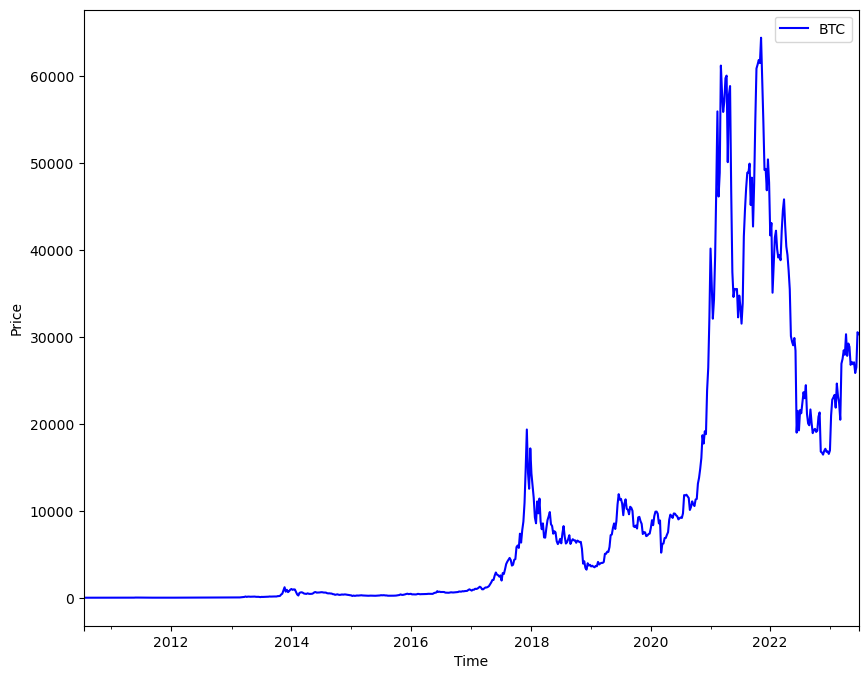

In [12]:
# Plot function of the time-series graph
bitcoin.plot(xlabel='Time', ylabel='Price',figsize=(10,8), subplots=False, grid=False, colormap='winter')
plt.savefig('Bitcoin Price development.png',  dpi=300)

## Statistical Analysis

After the development of the time series analysis, it is possible to study a series of statistical features such as stationarity, seasonality, randomness and trends.
Through a series of different tests, we have examined these characteristics as can be seen in the following lines of the code.

1) Stationarity: a time series has stationarity if a shift in time does not cause a change in the shape of its distribution; therefore, a stationary distribution has constant mean and variance values over time.
As can be seen from Table 1 and 2, the mean and the variance of Bitcoin have not been stable over the period of time analysed. This first discovery tells us that our time series is not stationary; furthermore, to support this finding, we develop the autocorrelation graph that shows how the plot does not drop to 0 quickly which is what would happen in the case of a stationary time series.
To conclude, we have obtained the p-value of our measurements by using the Dickey-Fuller test and, from it, we can observe how the p-value is much higher than 5% showing, once again, the absence of stationarity.

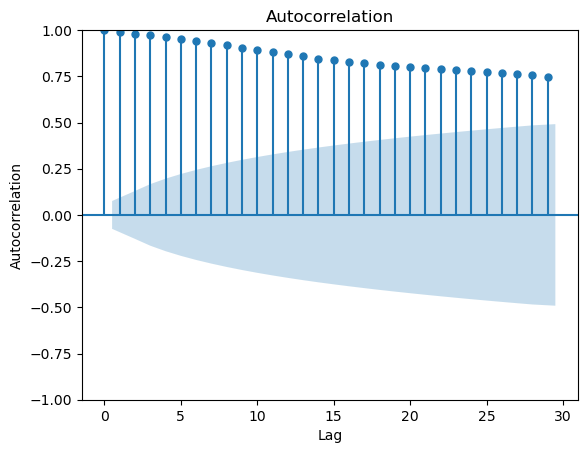

In [13]:
from statsmodels.compat.pandas import deprecate_kwarg
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation graph of Bitcoin prices
plot_acf (bitcoin.BTC)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig('Autocorrelation of Bitcoin.png')

In [14]:
# Dickey-Fuller test of Bitcoin prices
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(bitcoin.BTC)[1])

Dickey–Fuller test: p=0.693746


2) Seasonality: a time series has seasonality when its data experiences regular and predictable changes, in particular any fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.
Usually, non-stationarity should be followed by the presence of seasonality and trends: this can be observed through the tests developed in the next lines of the code. Furthermore, we have divided the data in three main groups (based on the past halving dates) in order to observe seasonal patterns and trends near the halving days.

<Figure size 1500x700 with 0 Axes>

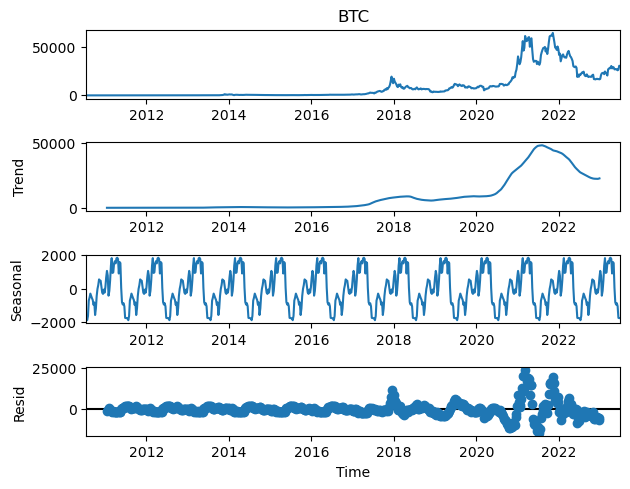

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal graph of Bitcoin prices
plt.figure(figsize = [15,7])
sm.tsa.seasonal_decompose(bitcoin.BTC).plot()
plt.xlabel('Time')
plt.show()

In [16]:
first_halving = bitcoin["2011-11-27":"2013-11-24"]
second_halving = bitcoin["2015-07-12":"2017-07-09"]
third_halving = bitcoin["2019-05-12":"2021-05-09"]

<Figure size 1500x700 with 0 Axes>

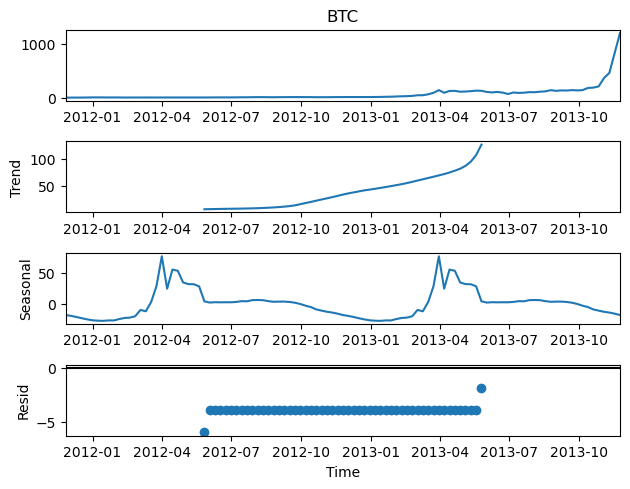

In [17]:
# Seasonal graph of Bitcoin prices (first halving period)
plt.figure(figsize = [15,7])
sm.tsa.seasonal_decompose(first_halving.BTC).plot()
plt.xlabel('Time')
plt.show()

<Figure size 1500x700 with 0 Axes>

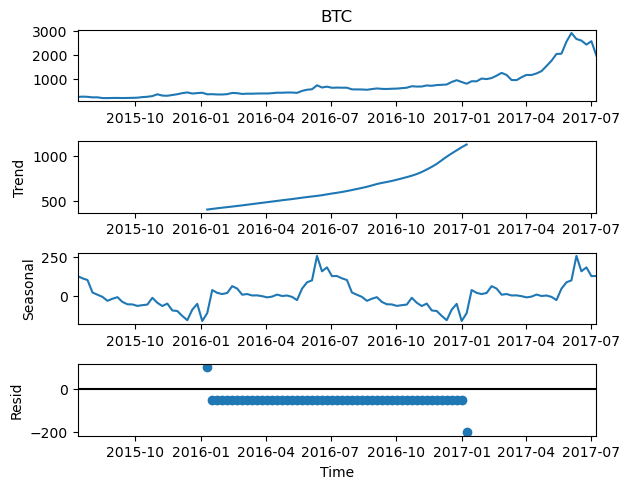

In [18]:
# Seasonal graph of Bitcoin prices (second halving period)
plt.figure(figsize = [15,7])
sm.tsa.seasonal_decompose(second_halving.BTC).plot()
plt.xlabel('Time')
plt.show()

<Figure size 1500x700 with 0 Axes>

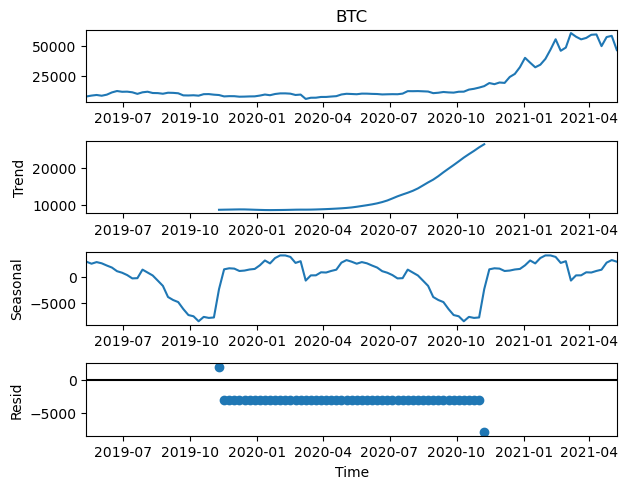

In [19]:
# Seasonal graph of Bitcoin prices (third halving period)
plt.figure(figsize = [15,7])
sm.tsa.seasonal_decompose(third_halving.BTC).plot()
plt.xlabel('Time')
plt.show()

3) Randomness: this feature, if present in a time series, shows the apparent or actual lack of pattern or predictability in its data.
To study this characteristic, we create a new autocorrelation graph different from the one used for analysing stationarity; since the majority of the autocorrelations in it are near to 0, it is possible to state that the data are random.

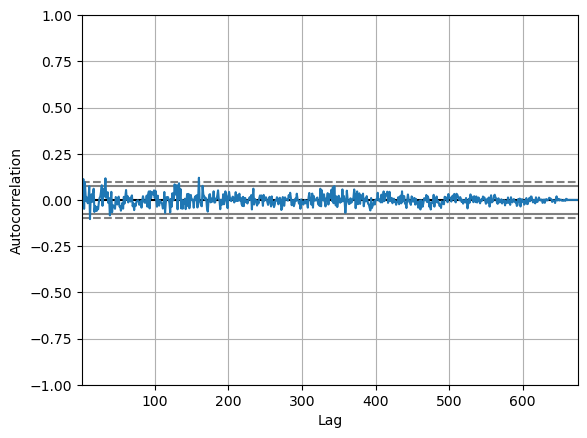

In [20]:
# Autocorrelation graph of Bitcoin returns
pd.plotting.autocorrelation_plot(log_returns.BTC)
plt.savefig('Autocorrelation of Bitcoin Returns.png')

4) Normal distribution: it's typical of a function that presents the distribution of many random variables as a symmetrical bell-shaped graph. As it can be seen from the chart, our historical data do not follow such a distribution. To carry out this test, we have used the code coming from the lecture of Prof. Lukas on the 15th of June 2023.

In [21]:
# Mean of the distribution
m1d = np.mean(log_returns.BTC)
m1a = m1d*52

# Volatility of the distribution
s1d = np.std(log_returns.BTC)
s1a = s1d*np.sqrt(52)

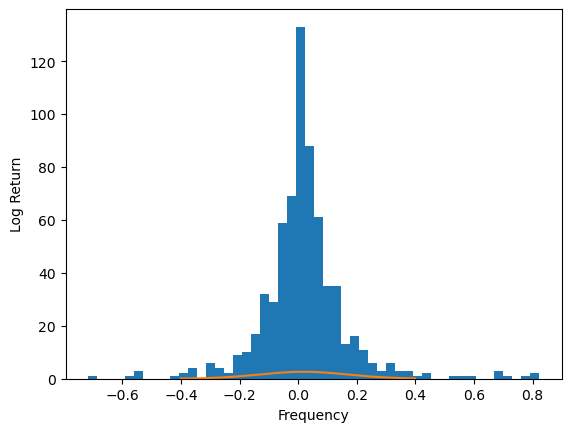

In [22]:
# Histogram of Bitcoin log returns compared to the normal density function 
binN=50

x = np.arange(-0.4, 0.4, 0.001) 
plt.hist(log_returns.BTC, bins=binN)

plt.plot(x, norm.pdf(x, m1d,s1d))
plt.xlabel('Frequency')
plt.ylabel('Log Return')
plt.savefig('Normal Distribution Test for Bitcoin.png')

## ARIMA Model

The ARIMA model is used to forecast the future values of a time series analysis through past data, that is its own lags and the lagged forecast errors. One important characteristic that should not be present in a time series, studied with this model, is seasonality.

We start by finding the ideal values for p (order of the AR term), q (order of the MA term) and d (number of differencing required to make the time series stationary) that will be used in the ARIMA model.

In [23]:
from pmdarima import auto_arima

# AIC analysis to determine the best p,d,q combination to apply in the ARIMA model
stepwise_fit = auto_arima(bitcoin['BTC'], trace = True,
suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12004.593, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12014.899, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12013.394, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12012.529, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12013.335, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12010.114, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12009.699, Time=0.45 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12005.717, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12006.040, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12008.151, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12006.109, Time=0.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12005.980, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12004.760, Time=1.35 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=12002.943, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Regression analysis based on the ARIMA model developed with the p,d,q values previously obtained
arima_model = ARIMA(bitcoin.BTC, order = (3,1,5))
model = arima_model.fit()
print (model.summary())

C:\Users\anghi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\anghi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\anghi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    BTC   No. Observations:                  676
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -5987.802
Date:                Sat, 10 Feb 2024   AIC                          11993.605
Time:                        16:15:35   BIC                          12034.237
Sample:                    07-18-2010   HQIC                         12009.338
                         - 06-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1792      0.075     -2.394      0.017      -0.326      -0.033
ar.L2         -0.3066      0.062     -4.963      0.000      -0.428      -0.186
ar.L3          0.5981      0.067      8.957      0.0

In [25]:
# Division of the data into train and test values to obtain the final graphical representation of the ARIMA model
train = bitcoin.iloc[:156]
test = bitcoin.iloc[52:]

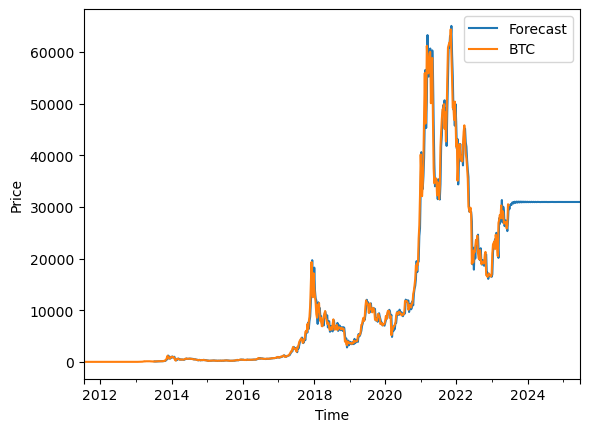

In [26]:
# Plot function to show the ARIMA model results for both historical and forecasted data
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('Forecast') # Function to forecast the future price pattern (2 years)
pred.plot(legend=True)
test['BTC'].plot(legend=True)
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig('ARIMA Model.png')

## GARCH Model

GARCH is a statistical model that can be used to analyze and forecast the volatility of returns of different securities.

In [27]:
from arch import arch_model

In [28]:
log_returns_pct = log_returns * 100

In [29]:
# Regression analysis based on the GARCH model using percentage log returns
model_garch = arch_model(log_returns_pct[1:], mean = "Constant", vol ="GARCH", p = 1, q = 1)
model_fit = model_garch.fit()
results_garch = model_garch.fit(update_freq = 5)
results_garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18344.620648757904
Iteration:      2,   Func. Count:     14,   Neg. LLF: 7517.7065930992485
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2917.941587224108
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2713.3803637618516
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2670.4476850400697
Iteration:      6,   Func. Count:     40,   Neg. LLF: 2670.4468616763543
Iteration:      7,   Func. Count:     45,   Neg. LLF: 2670.4468252956294
Iteration:      8,   Func. Count:     49,   Neg. LLF: 2670.4468252960332
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2670.4468252956294
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2670.4476850400697
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2670.4468252956294
            Iterations: 8
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    BTC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2670.45
Distribution:                  Normal   AIC:                           5348.89
Method:            Maximum Likelihood   BIC:                           5366.95
                                        No. Observations:                  674
Date:                Sat, Feb 10 2024   Df Residuals:                      673
Time:                        16:15:35   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.2280      0.394      3.117  1.824e-03 [  0.456,  2.000]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.5476      4.290      1.526      0.127   [ -1.861, 14.956]
alpha[1]       0.0975  4.650e-02      2.096  3.607e-02 [6.332e-03,  0.189]
beta[1]        0.8651  6.134e-02     14.105  3.548e-45   [  0.745,  0.985]
==========================================================================

Covariance estimator: robust
"""

In [30]:
# GARCH model application to analyse the volatility of historical data
rolling_predictions = []
test_size = 500 # Number of tests

for i in range(test_size):
    train_garch = log_returns_pct[:-(test_size-i)]
    model_garch_1 = arch_model(train_garch, p=1, q=1)
    model_fit_1 = model_garch_1.fit(disp='off')
    pred = model_fit_1.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [31]:
rolling_predictions = pd.Series(rolling_predictions, index = log_returns_pct.index[-500:])

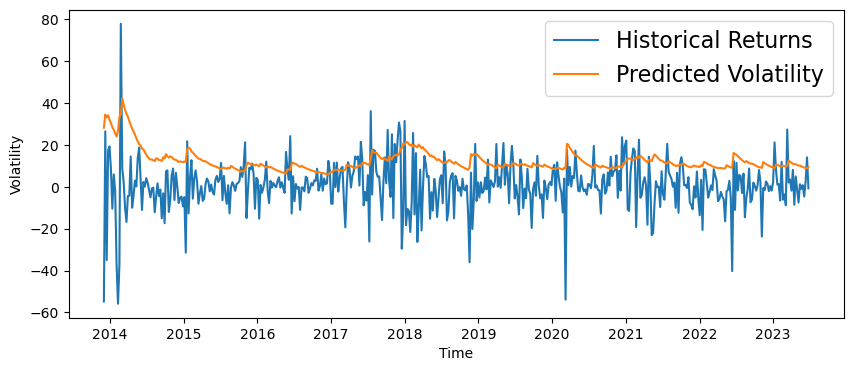

In [32]:
# Plot function to show the GARCH model results for historical data
plt.figure(figsize=(10,4))
true = plt.plot(log_returns_pct[-500:])
preds = plt.plot(rolling_predictions)
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['Historical Returns', 'Predicted Volatility'], fontsize=16)
plt.savefig('GARCH Model - Historical Data.png')

In [33]:
from datetime import datetime, timedelta

# GARCH model application to determine the volatility of forecasted data (2 years)
pred_1 = model_fit_1.forecast(horizon = 104, reindex = True)
future_dates = [log_returns_pct.index[-1] + timedelta(weeks = i) for i in range(1,105)]
pred_1 = pd.Series(np.sqrt(pred_1.variance.values[-1,:]), index = future_dates)

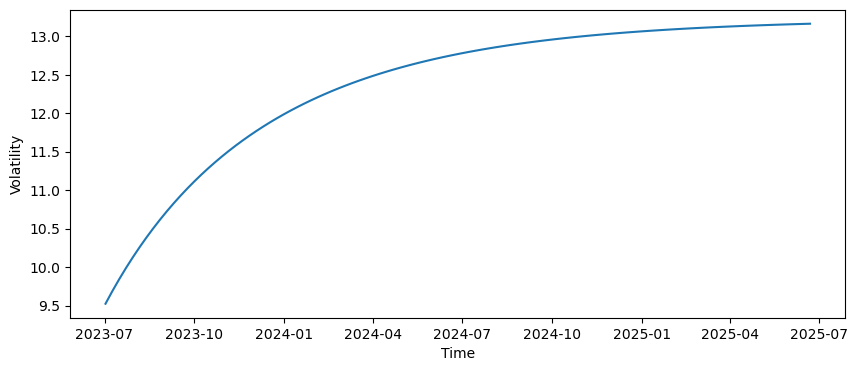

In [34]:
# Plot function to show the GARCH model results for forecasted data
plt.figure(figsize=(10,4))
plt.plot(pred_1)
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.savefig('GARCH Model - Forecast.png')

## Future Price Forecasting

We try to obtain a forecast of the future prices of Bitcoin in a 1 year period (fourth halving period: 04/2024 - 05/2024) and in a 2 years period (1 year after the fourth halving: 04/2025 - 05/2025). We use the percentage returns and weight them by using the volume.

In [35]:
# Mean of the distribution in percentage
entire_period_returns_pct = log_returns_pct.mean()*52
before_first_halving_pct = log_returns_pct["2011-11-27":"2012-11-25"].mean()*52
after_first_halving_pct = log_returns_pct["2012-11-25":"2013-11-24"].mean()*52
before_second_halving_pct = log_returns_pct["2015-07-12":"2016-07-10"].mean()*52
after_second_halving_pct = log_returns_pct["2016-07-10":"2017-07-16"].mean()*52
before_third_halving_pct = log_returns_pct["2019-05-12":"2020-05-10"].mean()*52
after_third_halving_pct = log_returns_pct["2020-05-10":"2021-05-16"].mean()*52

In [36]:
table3 = pd.DataFrame()
table3["Entire Period"] = entire_period_returns_pct
table3["B. First Halving"] = before_first_halving_pct
table3["A. First Halving"] = after_first_halving_pct
table3["B. Second Halving"] = before_second_halving_pct
table3["A. Second Halving"] = after_second_halving_pct
table3["B. Third Halving"] = before_third_halving_pct
table3["A. Third Halving"] = after_third_halving_pct
table3

,Entire Period,B. First Halving,A. First Halving,B. Second Halving,A. Second Halving,B. Third Halving,A. Third Halving
BTC,97.237974,158.688899,449.075838,80.113955,141.612217,26.077859,131.534828


In [37]:
# Obtainment of Bitcoin weekly volume values for the period 18/07/2010 - 25/06/2023
bitcoin_volume=pd.read_excel('Bitcoin Weekly Prices.xlsx', index_col = 0)

In [38]:
bitcoin_volume.drop(columns=['Close'], inplace=True)

In [39]:
bitcoin_volume

,Volume
Date,
2010-07-18,6550.0
2010-07-25,25290.0
2010-08-01,28560.0
2010-08-08,41260.0
2010-08-15,46720.0
...,...
2023-05-28,364200.0
2023-06-04,392440.0
2023-06-11,403420.0


In [40]:
# total quantity of volume for each of the 3 halving periods
before_sumvolume_halving1 = bitcoin_volume["2011-11-27":"2012-11-25"].sum()
after_sumvolume_halving1 = bitcoin_volume["2012-11-25":"2013-11-24"].sum()
before_sumvolume_halving2 = bitcoin_volume["2015-07-12":"2016-07-10"].sum()
after_sumvolume_halving2 = bitcoin_volume["2016-07-10":"2017-07-16"].sum()
before_sumvolume_halving3 = bitcoin_volume["2019-05-12":"2020-05-10"].sum()
after_sumvolume_halving3 = bitcoin_volume["2020-05-10":"2021-05-16"].sum()

In [41]:
table4 = pd.DataFrame()
table4["Before First Halving"] = before_sumvolume_halving1
table4["After First Halving"] = after_sumvolume_halving1
table4["Before Second Halving"] = before_sumvolume_halving2
table4["After Second Halving"] = after_sumvolume_halving2
table4["Before Third Halving"] = before_sumvolume_halving3
table4["After Third Halving"] = after_sumvolume_halving3
table4

,Before First Halving,After First Halving,Before Second Halving,After Second Halving,Before Third Halving,After Third Halving
Volume,21762870.0,18135410.0,28689450.0,24164020.0,340110000.0,184294960.0


In [42]:
# Weighted volume values for each of the 3 halving periods
weight_before_h1=before_sumvolume_halving1/(before_sumvolume_halving1+before_sumvolume_halving2+before_sumvolume_halving3)
weight_before_h2=before_sumvolume_halving2/(before_sumvolume_halving1+before_sumvolume_halving2+before_sumvolume_halving3)
weight_before_h3=before_sumvolume_halving3/(before_sumvolume_halving1+before_sumvolume_halving2+before_sumvolume_halving3)
weight_after_h1=after_sumvolume_halving1/(after_sumvolume_halving1+after_sumvolume_halving2+after_sumvolume_halving3)
weight_after_h2=after_sumvolume_halving2/(after_sumvolume_halving1+after_sumvolume_halving2+after_sumvolume_halving3)
weight_after_h3=after_sumvolume_halving3/(after_sumvolume_halving1+after_sumvolume_halving2+after_sumvolume_halving3)

In [43]:
table5 = pd.DataFrame()
table5["Weight  Before First Halving"] = weight_before_h1
table5["Weight After First Halving"] = weight_after_h1
table5["Weight Before Second Halving"] = weight_before_h2
table5["Weight After Second Halving"] = weight_after_h2
table5["Weight Before Third Halving"] = weight_before_h3
table5["Weight After Third Halving"] = weight_after_h3
table5

,Weight Before First Halving,Weight After First Halving,Weight Before Second Halving,Weight After Second Halving,Weight Before Third Halving,Weight After Third Halving
Volume,0.055722,0.080035,0.073457,0.10664,0.870821,0.813325


In [44]:
# Weighted average values for each of the 3 halving periods (the weight used is Bitcoin trading volume)
weight_average_before_h1=weight_before_h1[-1] * before_first_halving_pct[-1]
weight_average_after_h1=weight_after_h1[-1] * after_first_halving_pct[-1]
weight_average_before_h2=weight_before_h2[-1] * before_second_halving_pct[-1]
weight_average_after_h2=weight_after_h2[-1] * after_second_halving_pct[-1]
weight_average_before_h3=weight_before_h3[-1] * before_third_halving_pct[-1]
weight_average_after_h3=weight_after_h3[-1] * after_third_halving_pct[-1]

In [45]:
print('Weighted Average Return BH1 =', weight_average_before_h1)
print('Weighted Average Return AH1 =', weight_average_after_h1)
print('Weighted Average Return BH2 =', weight_average_before_h2)
print('Weighted Average Return AH2 =', weight_average_after_h2)
print('Weighted Average Return BH3 =', weight_average_before_h3)
print('Weighted Average Return AH3 =', weight_average_after_h3)

Weighted Average Return BH1 = 8.842445095827909
Weighted Average Return AH1 = 35.94164198954302
Weighted Average Return BH2 = 5.884913060013926
Weighted Average Return AH2 = 15.1015232589921
Weighted Average Return BH3 = 22.709155785225743
Weighted Average Return AH3 = 106.98060932890378


In [46]:
# Average of the weighted average values for both before and after halving
before_halvings_average = ((weight_average_before_h1 + weight_average_before_h2 + weight_average_before_h3) / 3) / 100
after_halvings_average = ((weight_average_after_h1 + weight_average_after_h2 + weight_average_after_h3) / 3) / 100
print('Weighted Average Return BH =', before_halvings_average)
print('Weighted Average Return AH =', after_halvings_average)

Weighted Average Return BH = 0.12478837980355857
Weighted Average Return AH = 0.5267459152581296


In [47]:
# Obtainment of Bitcoin current price
bitcoin_1 = yf.Ticker("BTC-USD")

In [48]:
bitcoin_today = bitcoin_1.history(period="1da")

In [49]:
bitcoin_today.drop(columns=['High', 'Low', 'Open', 'Volume', 'Dividends', 'Stock Splits'], inplace=True)

In [50]:
bitcoin_today.rename(columns={'Close':'BTC'}, inplace = True)

In [51]:
bitcoin_today

,BTC
Date,
2024-02-10 00:00:00+00:00,47311.84375


In [52]:
lastprice = bitcoin_today.iloc[-1]['BTC']

In [53]:
# Application of the weighted average return, obtained for the before halving period, on today's price
forecast_1year = lastprice * (1 + before_halvings_average)

In [54]:
# Application of the weighted average return, obtained for the after halving period, on forecasted price at the fourth halving
forecast_2year = forecast_1year * (1 + after_halvings_average)

We apply the weighted return to the current Bitcoin price to determine the forecasts.

In [55]:
print('1 Year Price Forecast =', forecast_1year)
print('2 Years Price Forecast =', forecast_2year)

1 Year Price Forecast = 53215.81207708162
2 Years Price Forecast = 81247.0237158286


## Monte Carlo Simulation

We develop a Monte Carlo simulation in order to obtain a range of possible outcomes that our underlying asset might follow in the future. This model is used to show the impact that risk and uncertainty.

At first, we define the variables that are part of this model:
- S0: current price
- r: risk-free rate (we use the 1 year EURIBOR)
- sigma: volatility
- T: time horizon (in years)
- I: number of simulated processes
- M: number of time intervals
- K: strike price.

In [56]:
S0 = 30310.84
r = 0.03928
sigma = 1.097 
T = 2
I = 250000
M = 100
K = 10000
np.random.seed(1000)

In [57]:
# Definition of the generate_gbm_paths to obtain simulated Monte Carlo paths for Bitcoin price
def generate_gbm_paths(S0, r, sigma, T, M, I):
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0 # This function generates 250.000 paths with 50 time steps each
    
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + 
                                         sigma * m.sqrt(dt) * rand) # Vectorized Euler discretization of gBm
        
    return paths

In [58]:
paths = generate_gbm_paths(S0, r, sigma, T, M, I)

In [59]:
# Expected value of Bitcoin price based on the Monte Carlo simulation
expected_value = S0 * m.exp(r * T)
expected_value

32788.09211869668

In [60]:
# Average simulated value value of Bitcoin price based on the Monte Carlo simulation
average_sim_value = paths[-1].mean()
average_sim_value

32838.32274870924

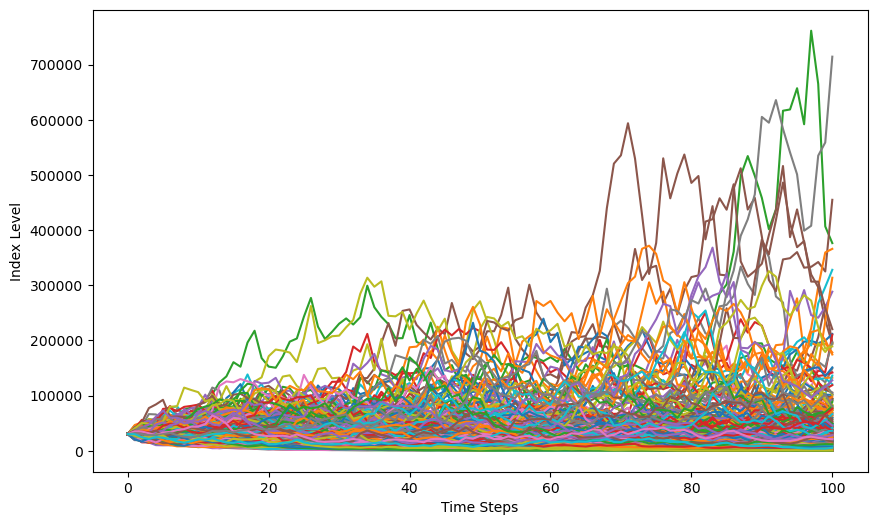

In [61]:
# Plot function to show the Monte Carlo simulated paths (price)
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :500]) # Number of simulated paths
plt.xlabel('Time Steps')
plt.ylabel('Index Level')
plt.savefig('MC Simulation - Prices.png')

In [62]:
log_returns_MC = np.log(1 + bitcoin.pct_change())

In [63]:
# Development of a second Monte Carlo simulation for Bitcoin return
num_simulations = 500 # Number of simulated paths
num_weeks = 104 # Simulation period
daily_volume = log_returns.std()
simulation_df = pd.DataFrame()

In [64]:
simulation_df = pd.DataFrame(columns=range(num_simulations))  

for col in simulation_df.columns:
    simulated_returns = np.random.normal(0, daily_volume, num_weeks) + 1 # This function generates simulations for Bitcoin return
        
    simulated_prices = [log_returns.iloc[-1]] 
    for i in range(num_weeks):
        simulated_prices.append(simulated_prices[-1] * simulated_returns[i]) # This function generates simulations for Bitcoin price

    simulation_df[col] = simulated_prices

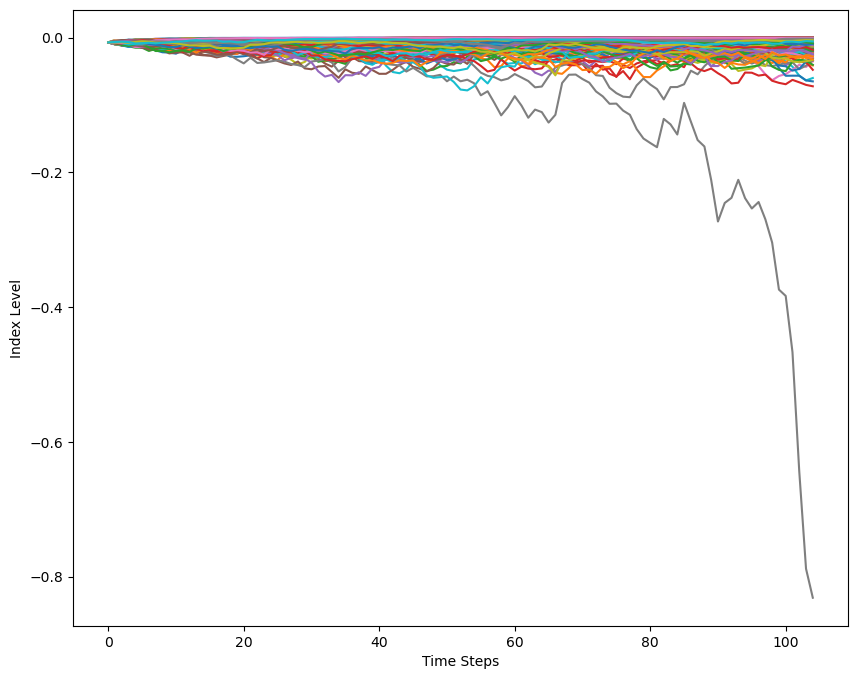

In [65]:
# Plot function to show the Monte Carlo simulated paths (return)
plt.figure(figsize=(10, 8))
plt.plot(simulation_df)
plt.xlabel('Time Steps')
plt.ylabel('Index Level')
plt.savefig('MC Simulation - Returns.png')

## Option Valuation

We conclude by evaluating a call option by means of the Black-Scholes-Merton model using the Monte Carlo simulation previously developed; therefore, we use the Monte Carlo estimator $C_{0}$ to obtain the present value of the European option. To carry out this last section of the code, we use a 1 year maturity, instead of 2 years as we did previously, in order to be able to compare the values that we get to the ones of the market.

In [66]:
import numpy.random as npr
T_Option = 1 # Maturity of the option 
def gen_sn(M, I, anti_paths=True, mo_match=True): # This function is used to generate random numbers for a simulation
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2))) # Standard normally distributed random numbers
        sn = np.concatenate((sn, -sn), axis=1) # This function concatenates two ndarray objects
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std() # Corrects both first and second moment in a single step
    return sn

In [67]:
def gbm_mcs_dyna(K, option='call'):
    dt = T_Option / M
    S = np.zeros((M + 1, I)) # Index level paths simulation
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                                 + sigma * m.sqrt(dt) * sn[t])
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0) # Call payoff
    else:
        hT = np.maximum(K - S[-1], 0) # Put payoff
    C0 = m.exp(-r * T_Option) * np.mean(hT) # Monte Carlo estimator
    return C0

In [68]:
# European call option value based on the Monte Carlo estimator
gbm_mcs_dyna(K=10000, option='call')

22148.976328085613

In [69]:
from math import log, sqrt, exp
from scipy import stats

def bsm_call_value(S0, K, T_Option, r, sigma):
    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T_Option) / (sigma * sqrt(T_Option))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T_Option) / (sigma * sqrt(T_Option))
    
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
    K * exp(-r * T_Option) * stats.norm.cdf(d2, 0.0, 1.0)) # Cumulative distribution function for normal distribution
    
    return value

In [70]:
# This function can be used to study the reliability of the simulation-based results
dyna_res = [] # Creates empty list objects
anal_res = [] # Creates empty list objects
k_list = np.arange(10000., 10500.1, 100.) # Ndarray object containing the strike prices' range 
np.random.seed(100)

for K in k_list:
    dyna_res.append(gbm_mcs_dyna(K)) # Option value simulations for the strike prices previously chosen
    anal_res.append(bsm_call_value(S0, K, T_Option, r, sigma)) # Option value simulations for the strike prices previously chosen

dyna_res = np.array(dyna_res) # Transforms the list objects into ndarray objects
anal_res = np.array(anal_res) # Transforms the list objects into ndarray objects

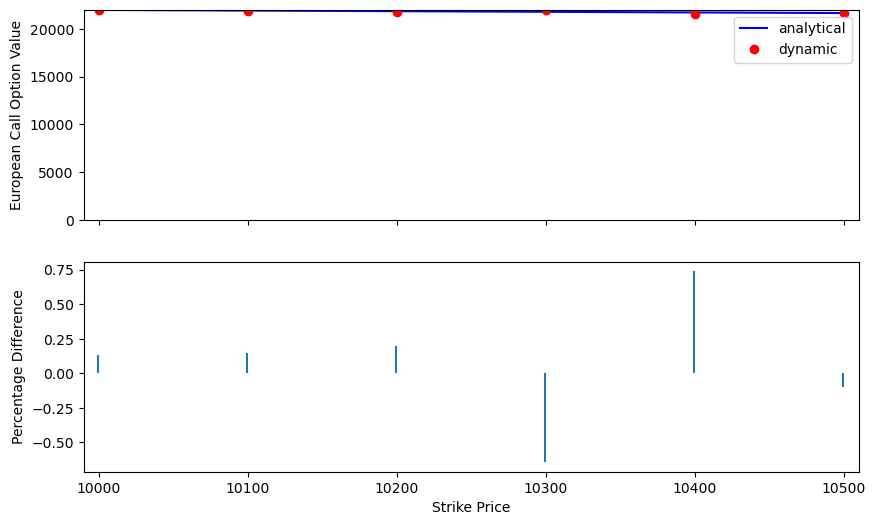

In [71]:
# Plot function to show the previous test regarding option values
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European Call Option Value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('Strike Price')
ax2.set_ylabel('Percentage Difference')
ax2.set_xlim(left=9990, right=10510)
plt.savefig('Final Test.png')

## References

- https://www.investing.com/crypto/bitcoin/historical-data
- https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
- https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453
- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
- https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html
- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
- Yves J. Hilpisch (2018). Python for Finance. O'Reilly.
- Cryer, J. D., Chan, K. (2008). Time Series Analysis. Springer.